In [18]:
#Steven Zajac-Descoteaux
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 1. Dot Product

Write a function `matrix_multiply(A, B)` using for loops, `+` and `*` that takes in two matrices (can be list of lists, or 2d numpy array) and returns their dot product (matrix multiplication). It should work with column vectors ($k \times 1$ dimensions) and row vectors ($1 \times k$) normally.


```import numpy as np

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

matrix_multiply(A,B)

RETURNS: 
[[30, 36, 42],
 [66, 81, 96]]

---------example 2-------------
# This is a row vector
A = np.array([
    [1,2,3]
])

# This is a column vector
B = np.array([
    [1],
    [4],
    [7]
])

matrix_multiply(A,B)

RETURNS:
[[30]]

```

Use `np.dot` to test your output

In [794]:
import numpy as np

def matrix_multiply(A,B):
    """
    Multiply two matrices
    and return their product.
    """
    #Convert any list into np array
    A = np.array(A)
    B = np.array(B)

    if len(A) == 1: #if A is a row vector and y a column vector
        AB = np.zeros(len(A))
        for _ in range(len(B)):
            AB += A[0][_] * B[_][0]

    #If len of b is 1, then we want 
    elif len(B) == 1: #if B is a row vector and A a column vector
        AB = np.zeros(len(B))
        for _ in range(A):
            AB += A[_][0] * B[0][_]
   
    else:
        AB = np.zeros((len(A),len(B))) #Empty matrix
        for i in range(len(A)): 
            for j in range(len(B)): 
                for k in range(len(B)): #Common index 

                    AB[i][j] += A[i][k] * B[k][j] 

    print(AB)

In [795]:
A = [[1,2,3],[4,5,6]]
B = [[1,2,3],[4,5,6],[7,8,9]]
matrix_multiply(A,B)

[[30. 36. 42.]
 [66. 81. 96.]]


In [796]:
np.dot(A,B)

array([[30, 36, 42],
       [66, 81, 96]])

In [797]:
a = np.array([[1,2,3]])
b = np.array([[1],[4],[7]])

matrix_multiply(a,b)

[30.]


In [798]:
np.dot(a,b)

array([[30]])

# 2 Matrix Math torture

**2.1** Give 3 examples of non-invertible square matrices that are non-zero

**2.2** Explain why the identity matrix $I$ is necessarily a square matrix with only $1$'s on the diagonal (hint: use the dot product from Q1)

**2.3** The **trace** is commutative for two matrices so $tr(AB) = tr(BA)$. Give an example where this is false for 3 matrices which can all be multiplied together.

**2.4** Give an example of a nonzero $4 \times 4$ idempotent matrix (where $A \cdot A = A^2 = A$)

**2.5** solve the following system of equations for `x`, `y` and `z` using matrices and `numpy.linalg.solve`

$$x 	+ 	y 	+ 	z 	= 	6$$

  	  	$$2y 	+ 	5z 	= 	−4$$

$$2x 	+ 	5y 	− 	z 	= 	27$$

## Determinants

### 2X2 Matrix:

|A| = ad - bc

### 3X3 Matrix

|A| = a(ei - fh) - b(di - fg) + c(dh - eg)

### 4X4 (and up) Matrix

https://www.mathsisfun.com/algebra/matrix-determinant.html


Inverse of A is A**-1 only when:

A * A** -1 = A** -1 * A = I

matrix times its invers is equal to the inverse time the matrix and both result in identity matrix

In [802]:
#2.1: Give 3 examples of non-invertible square matrices that are non-zero

a = np.array([[3,4],
              [6,8]])

a_det = np.linalg.det(a)

b = np.array([[6,10],
              [3,5]])

b_det = np.linalg.det(b)

c = np.array([[1,4,-1],
              [2,8,7],
              [1,4,-4]])

c_det = np.linalg.det(c)

print(a_det,b_det,c_det)

0.0 0.0 0.0


In [40]:
#To find value of a so determinant is 0 
a=a
b=4
c=-1
d=2
e=8
f=7
g=1
h=4
i=-4

#x = a*(e*i-h*f)-d*(b*i-h*c)+g*(b*f-e*c)
#x

a = (b*(d*i-f*g) - c*(d*h-e*g))/(e*i-f*h)
a

1.0

In [788]:
#2.2: Explain why the identity matrix 𝐼 is necessarily a square matrix with only 1's on the diagonal
# (hint: use the dot product from Q1)

#The identity matrix plays a similar role to the number 1 in real number system in that multiplying a matrix by it's
# identity matrix will yield the original matrix. Basically it does not change the matrix that it is multiplying.
# If we take the dot product of a matrix with an identity matrix of the same shape & size, the product will be the 
# original matrix. In this case, the order of which matrix comes first in the multiplication does not change the
# outcome/results. 

m = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

i_m = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,1]
])

print(m@i_m)
print(i_m@m)
#Both results are the same. 

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [763]:
#2.3: The trace is commutative for two matrices so 𝑡𝑟(𝐴𝐵) = 𝑡𝑟(𝐵𝐴).
# Give an example where this is false for 3 matrices which can all be multiplied together.


#Trace, add the numbers diagonally like I matrix

a = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

b = np.array([
    [3,5,7],
    [9,1,2],
    [4,6,8]
])

c = np.array([
    [-1,5,7],
    [2,3,-4],
    [9,-2,8]
])

np.trace(a@b@c),np.trace(c@b@a)

#np.eye(4)

(2359, 2310)

In [43]:
#2.4: Give an example of a nonzero 4×4 idempotent matrix (where 𝐴⋅𝐴=𝐴2=𝐴 )

A = np.array([
    [1,0,0],
    [0,0,0],
    [0,0,1]
])

A, A**2

(array([[1, 0, 0],
        [0, 0, 0],
        [0, 0, 1]]),
 array([[1, 0, 0],
        [0, 0, 0],
        [0, 0, 1]]))

In [44]:
#2.5

a = np.array([[1,1,1],
              [0,2,5],
              [2,5,-1]
             ])

b = np.array([6,-4,27])

np.linalg.solve(a,b)

array([ 5.,  3., -2.])

In [45]:
#Verify

x = 5
y = 3
z = -2

e0 = x + y + z
e1 = 2*y + 5*z
e2 = 2*x + 5*y -z 

print(e0,e1,e2)

6 -4 27


# 3.1 Boston regression

Using statsmodels and the `boston` dataset, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [22]:
from sklearn.datasets import load_boston
import statsmodels.api as sm

boston = pd.DataFrame(data=load_boston().data, columns=load_boston().feature_names) #puts into PD DF

#Add MEDV to DF
boston['MEDV'] = load_boston().target #Target is MEDV

X = boston.drop('MEDV',axis=1) 
y = boston['MEDV']

X = sm.add_constant(X)

est = sm.OLS(y,X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        23:11:40   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
#Answer:
print(f'The coefficients are:\n\n{est.params}')
print(f'\nThe R Squared is: {est.rsquared}')

The coefficients are:

const      36.459488
CRIM       -0.108011
ZN          0.046420
INDUS       0.020559
CHAS        2.686734
NOX       -17.766611
RM          3.809865
AGE         0.000692
DIS        -1.475567
RAD         0.306049
TAX        -0.012335
PTRATIO    -0.952747
B           0.009312
LSTAT      -0.524758
dtype: float64

The R Squared is: 0.7406426641094095


In [6]:
# .target: https://stackoverflow.com/questions/17414040/what-does-target-mean-in-scikits-linear-regression-object

boston = pd.DataFrame(data=load_boston().data, columns=load_boston().feature_names) #puts into PD DF

y = load_boston().target

X = sm.add_constant(boston)

sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        20:56:35   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.2 Polynomial features

Use polynomial features to improve your regression model in `2.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

In [15]:
#More manual way degree 2
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston

boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

boston['MEDV'] = load_boston()['target']

sns.set()

X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

X_sq = X.apply(np.square)
X_sq.columns = X.columns+"_sq"

new_df = pd.concat((X, X_sq), axis=1)

new_df["constant"] = 1

#X = sm.add_constant(X)

est2 = sm.OLS(y,new_df).fit()

est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     94.57
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          9.83e-168
Time:                        21:00:56   Log-Likelihood:                -1390.1
No. Observations:                 506   AIC:                             2832.
Df Residuals:                     480   BIC:                             2942.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.3746      0.085     -4.418      0.000      -0.541      -0.208
ZN            -0.0588      0.032     -1.851      0.065      -0.121       0.004
INDUS         -0.1518      0.199     -0.764      0.445      -0.542       0.239
CHAS           1.3192      0.363      3.638      0.000       0.607       2.032
NOX          -18.9655     25.017     -0.758      0.449     -68.122      30.191
RM           -19.1818      2.796     -6.860      0.000     -24.676     -13.687
AGE           -0.0211      0.037     -0.563      0.574      -0.095       0.052
DIS           -2.5726      0.569     -4.519      0.000      -3.691      -1.454
RAD            0.6071      0.211      2.882      0.004       0.193       1.021
TAX           -0.0257      0.015     -1.751      0.081      -0.054       0.003
PTRATIO       -5.1596      1.677     -3.077      0.002      -8.454      -1.865
B              0.0227      0.011      2.053      0.041       0.001       0.044
LSTAT         -1.3178      0.128    -10.283      0.000      -1.570      -1.066
CRIM_sq        0.0030      0.001      2.735      0.006       0.001       0.005
ZN_sq          0.0007      0.000      2.128      0.034    5.58e-05       0.001
INDUS_sq       0.0070      0.008      0.918      0.359      -0.008       0.022
CHAS_sq        1.3192      0.363      3.638      0.000       0.607       2.032
NOX_sq        -3.2387     18.347     -0.177      0.860     -39.290      32.813
RM_sq          1.7410      0.219      7.956      0.000       1.311       2.171
AGE_sq         0.0002      0.000      0.545      0.586      -0.000       0.001
DIS_sq         0.1358      0.047      2.886      0.004       0.043       0.228
RAD_sq        -0.0087      0.008     -1.034      0.302      -0.025       0.008
TAX_sq      1.519e-05   1.94e-05      0.785      0.433   -2.28e-05    5.32e-05
PTRATIO_sq     0.1233      0.047      2.602      0.010       0.030       0.216
B_sq       -3.739e-05   2.43e-05     -1.541      0.124   -8.51e-05    1.03e-05
LSTAT_sq       0.0226      0.003      6.526      0.000       0.016       0.029
constant     159.0067     21.102      7.535      0.000     117.543     200.470
==============================================================================
Omnibus:                      156.761   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2614.786
Skew:                           0.876   Prob(JB):                         0.00
Kurtosis:                      13.998   Cond. No.                     1.30e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.18e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix 

In [9]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [13]:
"""from sklearn.preprocessing import PolynomialFeatures

#Degree: 2

boston = pd.DataFrame(data=load_boston().data, columns=load_boston().feature_names) #puts into PD DF

y = load_boston().target

X = sm.add_constant(boston)

poly_converter = PolynomialFeatures(degree=2,include_bias=False)

X = poly_converter.fit_transform(X)
est_2 = sm.OLS(y, X).fit()
est_2.summary()"""


'from sklearn.preprocessing import PolynomialFeatures\n\n#Degree: 2\n\nboston = pd.DataFrame(data=load_boston().data, columns=load_boston().feature_names) #puts into PD DF\n\ny = load_boston().target\n\nX = sm.add_constant(boston)\n\npoly_converter = PolynomialFeatures(degree=2,include_bias=False)\n\nX = poly_converter.fit_transform(X)\nest_2 = sm.OLS(y, X).fit()\nest_2.summary()'

In [23]:
#More manual way degree 3
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston

boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

boston['MEDV'] = load_boston()['target']

sns.set()

X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

#Square it
X_sq = X.apply(np.square)
X_sq.columns = X.columns+"_sq"

#Cube it
X_cb = X.pow(3)
X_cb.columns = X.columns+"_cb"

new_df3 = pd.concat((X, X_sq, X_cb), axis=1) #Merge all 3

new_df3["constant"] = 1 #Set constant

#X = sm.add_constant(X)

est3 = sm.OLS(y,new_df3).fit()

est3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     69.11
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          4.52e-165
Time:                        23:11:50   Log-Likelihood:                -1368.1
No. Observations:                 506   AIC:                             2812.
Df Residuals:                     468   BIC:                             2973.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.6902      0.167     -4.133      0.000      -1.018      -0.362
ZN             0.0388      0.062      0.623      0.533      -0.084       0.161
INDUS         -0.4663      0.462     -1.010      0.313      -1.374       0.441
CHAS           0.8544      0.237      3.613      0.000       0.390       1.319
NOX          378.6765    150.188      2.521      0.012      83.550     673.803
RM           -24.9684     16.221     -1.539      0.124     -56.844       6.907
AGE            0.0934      0.096      0.969      0.333      -0.096       0.283
DIS           -6.0695      1.466     -4.139      0.000      -8.951      -3.188
RAD            1.3791      0.698      1.976      0.049       0.008       2.750
TAX           -0.2003      0.075     -2.666      0.008      -0.348      -0.053
PTRATIO      -12.3726     15.559     -0.795      0.427     -42.947      18.202
B             -0.0047      0.028     -0.171      0.864      -0.059       0.050
LSTAT         -1.8291      0.302     -6.059      0.000      -2.422      -1.236
CRIM_sq        0.0134      0.005      2.516      0.012       0.003       0.024
ZN_sq         -0.0024      0.002     -1.203      0.230      -0.006       0.002
INDUS_sq       0.0480      0.042      1.154      0.249      -0.034       0.130
CHAS_sq        0.8389      0.237      3.546      0.000       0.374       1.304
NOX_sq      -642.8100    244.108     -2.633      0.009   -1122.494    -163.126
RM_sq          2.6770      2.588      1.034      0.301      -2.409       7.762
AGE_sq        -0.0022      0.002     -1.125      0.261      -0.006       0.002
DIS_sq         0.8336      0.259      3.217      0.001       0.324       1.343
RAD_sq        -0.1329      0.101     -1.319      0.188      -0.331       0.065
TAX_sq         0.0004      0.000      2.381      0.018    7.76e-05       0.001
PTRATIO_sq     0.5672      0.909      0.624      0.533      -1.219       2.353
B_sq           0.0001      0.000      0.854      0.394      -0.000       0.000
LSTAT_sq       0.0593      0.018      3.288      0.001       0.024       0.095
CRIM_cb    -8.519e-05   4.43e-05     -1.923      0.055      -0.000    1.85e-06
ZN_cb       2.424e-05   1.59e-05      1.527      0.127   -6.95e-06    5.54e-05
INDUS_cb      -0.0013      0.001     -1.253      0.211      -0.003       0.001
CHAS_cb        0.8409      0.237      3.554      0.000       0.376       1.306
NOX_cb       331.4957    128.969      2.570      0.010      78.066     584.926
RM_cb         -0.0484      0.135     -0.358      0.720      -0.314       0.217
AGE_cb      1.307e-05   1.14e-05      1.147      0.252   -9.32e-06    3.55e-05
DIS_cb        -0.0392      0.014     -2.794      0.005      -0.067      -0.012
RAD_cb         0.0038      0.003      1.178      0.239      -0.003       0.010
TAX_cb       -3.1e-07   1.41e-07     -2.204      0.028   -5.86e-07   -3.36e-08
PT

In [812]:
"""#Degree: 3
boston = pd.DataFrame(data=load_boston().data, columns=load_boston().feature_names) #puts into PD DF

y = load_boston().target

X = sm.add_constant(boston)

poly_converter = PolynomialFeatures(degree=3,include_bias=False)

X = poly_converter.fit_transform(X)
est_3 = sm.OLS(y, X).fit()

est_3.summary()"""

'#Degree: 3\nboston = pd.DataFrame(data=load_boston().data, columns=load_boston().feature_names) #puts into PD DF\n\ny = load_boston().target\n\nX = sm.add_constant(boston)\n\npoly_converter = PolynomialFeatures(degree=3,include_bias=False)\n\nX = poly_converter.fit_transform(X)\nest_3 = sm.OLS(y, X).fit()\n\nest_3.summary()'

# 3.3 Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.

- The y axis on each chart is the target value (house price)

- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each

- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well

- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

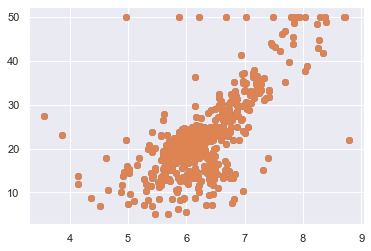

In [55]:
#Setting all other vals to mean or median

#new_df3['PRICE'] = y

og = new_df3.copy()
copy = new_df3.copy()
means = new_df3.apply(np.mean) # Setting to mean same as deleting (below)
for col in copy.columns:
    copy[col] = means[col]

y = load_boston()['target']
    
temp['RM_cb'] = og['RM_cb']

#temp = temp.drop('PRICE',axis=1)

#temp = sm.add_constant(temp)

temp_est = sm.OLS(y,temp).fit()

temp_est.summary()

y_hat = temp_est.predict(temp)

#x = temp['RM_cb'] #Cubed of RM

plt.scatter(new_df3['RM'], y_hat) #Num of rooms and prediction of price
plt.scatter(new_df3['RM'],y) #Num of rooms and actual price
plt.show()

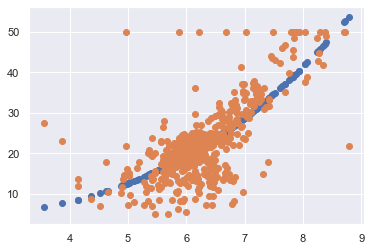

In [54]:
#Removing all other values but RM_cb #LSTAT was best but wanted to try another way**
import matplotlib.pyplot as plt

temp = new_df3.copy()

temp['PRICE'] = y
#new_df3.corr().sort_values(by='PRICE') #Shows the correlation
#RM_cb

small_df3 = temp['RM_cb'] #New df with only RM_cb

small_df3 = sm.add_constant(small_df3) #Add constant

small_est = sm.OLS(y,small_df3).fit() #Model 

small_est.summary() 

y_hat = small_est.predict(small_df3) #Predictions

#x = small_df3['RM_cb'] #Cubed of RM

#x_hat = np.linspace(min(X_room),max(X_room),len(X_room))

plt.scatter(temp['RM'], y_hat) #Num or rooms and prediction of price
plt.scatter(temp['RM'],y) #Num of rooms and actual price
plt.show()


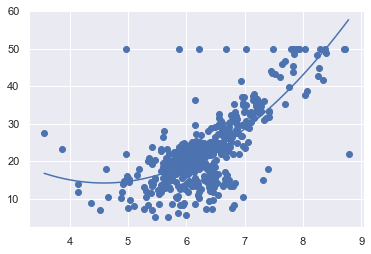

In [56]:
boston = pd.DataFrame(data=load_boston().data, columns=load_boston().feature_names)
boston['PRICE'] = load_boston().target #Target is PRICE
#new_df3.corr().sort_values(by='PRICE') #Shows the correlation

bosti = new_df3.copy()
bosti['PRICE'] = load_boston().target

X_room = bosti['RM'] #New df with only RM_cb, ignores other features

y_price = bosti.PRICE #y is the price
y_price = np.array(y_price)

X_room = sm.add_constant(X_room) #Add constant
X_room1 = np.array(X_room) # Deg 1
X_room2 = np.concatenate([X_room1,np.square(X_room1[:,1])[:,np.newaxis]],axis=1)# Deg 2
X_room3 = np.concatenate([X_room2,(X_room1[:,1]**3)[:,np.newaxis]],axis=1) # Deg 3


#Model where price(depenedent) and number of room and occurrence is X
results1 = sm.OLS(y_price,X_room1).fit() # Deg 1
results2 = sm.OLS(y_price,X_room2).fit() # Deg 2
results3 = sm.OLS(y_price,X_room3).fit() # Deg 3
#results.summary() 

bmin, bmax = X_room.min(), X_room.max() #Min & Max observed

#Max and Min of observed values
x_hat1 = sm.add_constant(np.linspace(bmin,bmax,len(bosti)))
x_hat2 = np.concatenate([x_hat1,np.square(x_hat1[:,1])[:,np.newaxis]],axis=1)#square term heree
x_hat3 = np.concatenate([x_hat2,(x_hat1[:,1]**3)[:,np.newaxis]],axis=1) #Third Degree

y_hat1 = results1.predict(x_hat1[:,np.newaxis]) # Degree 1 predictions
y_hat2 = results2.predict(x_hat2[:,np.newaxis]) # Degree 2 preds
y_hat3 = results3.predict(x_hat3[:,np.newaxis]) # Degree 3 preds

plt.plot(x_hat1[:,1], y_hat2) #Num of rooms and prediction of price
plt.scatter(bosti['RM'],y_price) #Num of rooms and actual price
plt.show()
#results.summary()




# 3.4 Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **2.4** but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

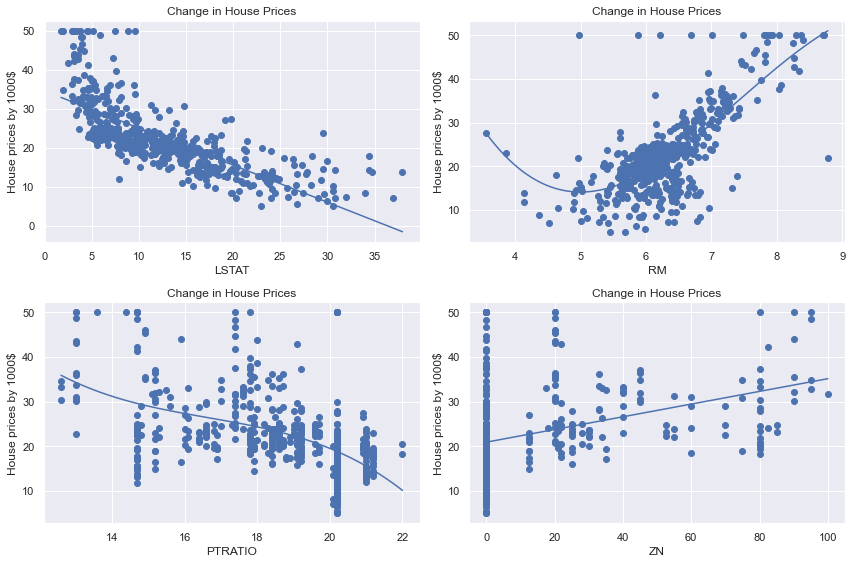

In [57]:
from sklearn.datasets import load_boston

def reg_plot_on_ax(feature):
    """
    Takes a feature and an axis and
    returns a plot for the four chosen
    features and axes.
    """
    boston = load_boston()

    bos_df = pd.DataFrame(boston.data,columns=boston.feature_names)
    bos_df['PRICE'] = boston.target
    
    feats = feature #Need to format features  to be only 
    features = []
    
    #Slices feature name so we remove the _sq or _cb
    for f in feats:
        if f[-3:] == '_sq':
            features.append(f[:-3])
        elif f[-3:] == '_cb':
            features.append(f[:-3])
        else:
            features.append(f)
            
    target = bos_df['PRICE'] #Y

    n = 0 #counter for below
    
    plt.figure(figsize=(12,8))
    for i, feat in enumerate(features):

        plt.subplot(2,len(features)//2, i+1)#nrows,ncols, index
        x = bos_df[feat]
        y = target

        x1 = sm.add_constant(x) #Add constant
        x1 = np.array(x1) # Deg 1
        x2 = np.concatenate([x1,np.square(x1[:,1])[:,np.newaxis]],axis=1)# Deg 2
        x3 = np.concatenate([x2,(x1[:,1]**3)[:,np.newaxis]],axis=1)

        results1 = sm.OLS(y,x1).fit()
        results2 = sm.OLS(y,x2).fit()
        results3 = sm.OLS(y,x3).fit()

        xmin,xmax = x.min(), x.max()

        #x values to predict
        x_hat1 = sm.add_constant(np.linspace(xmin,xmax,len(bos_df)))
        x_hat2 = np.concatenate([x_hat1,np.square(x_hat1[:,1])[:,np.newaxis]],axis=1)#square term heree
        x_hat3 = np.concatenate([x_hat2,(x_hat1[:,1]**3)[:,np.newaxis]],axis=1) #Third Degree
        
        #Predictions
        y_hat1 = results1.predict(x_hat1[:,np.newaxis]) # Degree 1 predictions
        y_hat2 = results2.predict(x_hat2[:,np.newaxis]) # Degree 2 preds
        y_hat3 = results3.predict(x_hat3[:,np.newaxis]) # Degree 3 preds

        #Sets regression degree to feature degree
        if feats[n][-3:] == '_sq': 
            y_hat = y_hat2
        elif feats[n][-3:] =='_cb':
            y_hat = y_hat3
        else:
            y_hat = y_hat1  
        n +=1 
        
        plt.scatter(x1[:,1],y)
        plt.plot(x_hat1[:,1],y_hat)
        plt.title("Change in House Prices")
        plt.xlabel(feat)
        plt.ylabel('House prices by 1000$')
        plt.tight_layout()
        
feature = ['LSTAT','RM_cb','PTRATIO_cb','ZN']
reg_plot_on_ax(feature)

In [ ]:
"""
features = ['LSTAT','ZN','RM_cb', 'PTRATIO_cb']
f = ['LSTAT','ZN','RM', 'PTRATIO']
    

df_ = new_df3.copy() 
df_['PRICE'] = load_boston().target
y_hats = []
y = df_.PRICE
n = 0

for _ in features:
    small_df = df_[_]
    #small_df = sm.add_constant(small_df)
    small_df = sm.add_constant(small_df)
    small_est = sm.OLS(y,small_df).fit()
    y_hat = small_est.predict(small_df)
    y_hats.append(y_hat)
        
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
#print(y_hats)
for i in range(2):
    for j in range(2):
        axes[i,j].plot(df_[f[n]],y_hats[n])
        axes[i,j].scatter(df_[f[n]],y)
        axes[i,j].set_title(f[n])
        axes[i,j].set_ylabel('Price')
        n +=1
plt.show()
"""